In [8]:
import requests
from bs4 import BeautifulSoup as Soup
import re

## 爬取 指定歌手的 專輯名稱 製作人 網址

In [15]:
# 設定變數
search_word = '五月天'
max_page = 3
only_producer = '五月天 (Mayday)'
exception_word_in_album = ['巡迴','演唱會','Live','LIVE', 'live', '電影原聲帶','搶先聽', '原聲']

In [18]:
userAgent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36'
headers = {
    'User-Agent':userAgent
    }

album_list = []
for page in range(1,max_page+1):
    url = 'https://www.kkbox.com/tw/tc/search.php?word={}&search=album&cur_page={}'.format(search_word,page)
    res = requests.get(url, headers=headers)
    soup = Soup(res.text, 'html.parser')
    raw_list = soup.select('div.album > div.height-wrap')
    for album in raw_list:
        to_next = False
        album_url = 'https://www.kkbox.com'+ album.select_one('h3 > a')['href']
        album_name = album.select_one('h3 > a')['title']
        try:
            producer = album.select_one('div.playlist-sharer > a')['title']
        except:
            continue
        if producer != only_producer:
            continue
        for not_word in exception_word_in_album:
            if not_word in album_name:
                to_next = True
                break
        if to_next:
            continue
        album_list.append([album_name, producer, album_url])
        print(album_name)

因為你 所以我 (Because Of You)
自傳 (history of Tomorrow)
五月天 | 步步 | 自選作品輯 the Best of 1999-2013
第二人生 Now Here 明日版
後 青春期的詩
愛情萬歲
第一張創作專輯
人生海海
神的孩子都在跳舞
時光機
為愛而生
勇敢 (Braveness)
溫柔 #MaydayBlue20th (TENDERNESS #MaydayBlue20th)
玫瑰少年 (Womxnly)
將軍令
離開地球表面
知足 just my pride 最真傑作選
凡人歌 (Song of Ordinary People)
我們是五月天
什麼歌 (What A Song)
轉眼（2018 自傳最終章） (Final Chapter)
由我們主宰
後來的我們 (眼淚未乾版) (Here, After, Us (Film Song Version))
DNA
瘋狂世界 #MaydayBlue20th (World Crazy #MaydayBlue20th)
小太陽
純真 #MaydayBlue20th (INNOCENCE #MaydayBlue20th)
Do You Ever Shine?
I WILL CARRY YOU
YOUR LEGEND ～燃ゆる命～
Dancin' Dancin'
候鳥五月天電影音樂作品


In [19]:
len(album_list)

32

## 爬取 專輯內歌曲的 歌曲名稱 網址

In [32]:
no_song_name = ['版','version','Live','live','LIVE', 'remix','日本','片尾曲', '插曲','主題']

In [46]:
total_song = dict()
for a in album_list:
    res = requests.get(a[2], headers=headers)
    soup = Soup(res.text, 'html.parser')
    song_list = soup.select('a.song-title')
    for s in song_list:
        to_next=False
        song_url = 'https://www.kkbox.com' + s['href']
        song = s['title']
        for n in no_song_name:
            if n in song:
                to_next=True
                break
    #         total_song.append([a[0], song, song_url])
        if to_next:
            continue
        try: 
            total_song[song] = total_song[song]
        except:
            total_song[song] = []
            total_song[song].extend([a[0],song_url])
    print('finish',a[0])
print(len(total_song))

finish 因為你 所以我 (Because Of You)
finish 自傳 (history of Tomorrow)
finish 五月天 | 步步 | 自選作品輯 the Best of 1999-2013
finish 第二人生 Now Here 明日版
finish 後 青春期的詩
finish 愛情萬歲
finish 第一張創作專輯
finish 人生海海
finish 神的孩子都在跳舞
finish 時光機
finish 為愛而生
finish 勇敢 (Braveness)
finish 溫柔 #MaydayBlue20th (TENDERNESS #MaydayBlue20th)
finish 玫瑰少年 (Womxnly)
finish 將軍令
finish 離開地球表面
finish 知足 just my pride 最真傑作選
finish 凡人歌 (Song of Ordinary People)
finish 我們是五月天
finish 什麼歌 (What A Song)
finish 轉眼（2018 自傳最終章） (Final Chapter)
finish 由我們主宰
finish 後來的我們 (眼淚未乾版) (Here, After, Us (Film Song Version))
finish DNA
finish 瘋狂世界 #MaydayBlue20th (World Crazy #MaydayBlue20th)
finish 小太陽
finish 純真 #MaydayBlue20th (INNOCENCE #MaydayBlue20th)
finish Do You Ever Shine?
finish I WILL CARRY YOU
finish YOUR LEGEND ～燃ゆる命～
finish Dancin' Dancin'
finish 候鳥五月天電影音樂作品
162


In [47]:
total_song

{'因為你 所以我 (Because Of You)': ['因為你 所以我 (Because Of You)',
  'https://www.kkbox.com/tw/tc/song/.xR00G7YGLMOJydwOJydw0XL-index.html'],
 '如果我們不曾相遇 (What If We Had Never Met)': ['自傳 (history of Tomorrow)',
  'https://www.kkbox.com/tw/tc/song/SnX00.XKN9XtJtRDtJtRD0XL-index.html'],
 '成名在望 (Almost Famous)': ['自傳 (history of Tomorrow)',
  'https://www.kkbox.com/tw/tc/song/THn00E1KN9XMjNrDMjNrD0XL-index.html'],
 '好好 (想把你寫成一首歌) (Song About You)': ['自傳 (history of Tomorrow)',
  'https://www.kkbox.com/tw/tc/song/5-o00yHKN9X5T75D5T75D0XL-index.html'],
 '兄弟 (Brotherhood)': ['自傳 (history of Tomorrow)',
  'https://www.kkbox.com/tw/tc/song/het00UHKN9XjBPXDjBPXD0XL-index.html'],
 '人生有限公司 (Life Co. Ltd.)': ['自傳 (history of Tomorrow)',
  'https://www.kkbox.com/tw/tc/song/Uf000G2KN9XNzUoDNzUoD0XL-index.html'],
 '後來的我們 (Here, After, Us)': ['自傳 (history of Tomorrow)',
  'https://www.kkbox.com/tw/tc/song/jpg00PlKN9Xc1cdDc1cdD0XL-index.html'],
 '頑固 (Tough)': ['自傳 (history of Tomorrow)',
  'https://www.kkbox.co

## 爬取 每一首歌曲的 歌詞

In [48]:
total_song['倔強'][1]

'https://www.kkbox.com/tw/tc/song/q8nTZ0r0rHm2DIMW2DIMW0PL-index.html'

In [49]:
song_lyr = []
wrong = []
for t in total_song:
    res = requests.get(total_song[t][1], headers=headers)
    soup = Soup(res.text, 'html.parser')
    try:
        lyrics = soup.select('div.lyrics > p')[1].text
    except:
        wrong.append(t)
        continue
    song_lyr.append([total_song[t][0], t, lyrics])
    print(t,end=' | ')
print(len(total_song), len(song_lyr))

因為你 所以我 (Because Of You) | 如果我們不曾相遇 (What If We Had Never Met) | 成名在望 (Almost Famous) | 好好 (想把你寫成一首歌) (Song About You) | 兄弟 (Brotherhood) | 人生有限公司 (Life Co. Ltd.) | 後來的我們 (Here, After, Us) | 頑固 (Tough) | 派對動物 (Party Animal) | 最好的一天 (Best Day of My Life) | 少年他的奇幻漂流 (Life of Planet) | 終於結束的起點 (Beginning of the End) | 任意門 (Dokodemo Door) | 轉眼 (Final Chapter) | 擁抱 | 傷心的人別聽慢歌 (貫徹快樂) | 洋蔥 | 乾杯 | 入陣曲 | 倔強 | 突然好想你 | 戀愛ing | 離開地球表面 | 星空 | 我不願讓你一個人 | 人生海海 | 知足 | 你是唯一 - TVBS偶像劇<A咖的路>片頭曲 | 夜訪吸血鬼 | 如煙 | 盛夏光年 | 一顆蘋果 | 三個傻瓜 | 孫悟空 | 摩托車日記 | 最重要的小事 | 愛情萬歲 | 雌雄同體 | 生命有一種絕對 | 諾亞方舟 | 我心中尚未崩壞的地方  | 憨人 | 有些事現在不做 一輩子都不會做了 | 洗衣機 | 三個傻瓜  | 歪腰 | 倉頡 | 2012 | 第二人生 | OAOA - 現在就是永遠 | T1213121 | 生存以上 生活以下 | 你不是真正的快樂 | 爆肝 | 噢買尬 | 出頭天 | 我心中尚未崩壞的地方 | 春天的吶喊 | 後青春期的詩 | 笑忘歌 | 為什麼 - 今日的愛情 | 終結孤單 | 明白 | 心中無別人 | 有你的將來 | 叫我第一名 | 雨眠 | 羅密歐與茱麗葉 | 溫柔 | 反而 | 瘋狂世界 | 透露 | 生活 | 愛情的模樣 | 嘿我要走了 | 軋車 | 志明與春嬌 | Hosee | 黑白講 | I Love You無望 | 風若吹 | 能不能不要說 | 好不好 | 相信 | OK啦 | 借問眾神明 | 永遠的永遠 | 彩虹 | 啾啾啾 | 純真 | 候鳥 | 垃圾車 | 小護士 | 讓我照顧你 | 約翰藍儂 | 回來吧 

In [58]:
len(song_lyr)

150

In [54]:
song_lyr[0]

['因為你 所以我 (Because Of You)',
 '因為你 所以我 (Because Of You)',
 '\n人群 煙火  香檳和氣球\n是你 帶我  從派對逃走\n逃離 人間  耳語和騷動\n這裏 只有  你我和星空\n你是 何時  靜靜靠近我\n你是 何時  偷偷拯救我\n在我 掌心  放了  一顆糖果\n\n人類 為何  都愛看天空\n背上 卻都  有一對傷口\n生在 這個  凡人的星球\n是否 不配  作天使的夢\n你將 你的  翅膀給了我\n帶我 穿越  狼群和鏡頭\n讓我 能夠  品嘗  片刻自由\n\n因為你 所以我   愛上那  片天空\n天空下 我在祈求   那是你  牽著我\n最深刻 的故事   最永恆  的傳說\n不過  是你  是我  能夠  平凡生活\n\n人生 只是  須臾的剎那\n人間 只是  天地的夾縫\n人們 何苦  要活成修羅\n活在 執著  對錯的牢籠\n是你 幫我  停下了沙漏\n是你 教我  別害怕闖禍\n是你 讓我  活得  與眾不同\n\n因為你 所以我   愛上那  片天空\n天空下 我在祈求   那是你  牽著我\n最深刻 的故事   最永恆  的傳說\n不過  是你  是我  能夠  平凡生活\n\n因為你 所以我   所以我  不退縮\n再不願 這一生中   有遺憾  不反駁\n不再聽 別人說   不在乎  誰能懂\n只因  世界 再大 不過  你和我\n用最小回憶  堆成宇宙\n\n因為你 所以我   愛上那  片天空\n天空下 我在祈求   那是你  牽著我\n最深刻 的故事   最永恆  的傳說\n不過  是你  是我  能夠  平凡生活\n\n因為你 所以我   所以我  不退縮\n再不願 這一生中   有遺憾  不反駁\n不再聽 別人說   不在乎  誰能懂\n只因  世界 再大 不過  你和我\n用最小回憶  堆成宇宙\n']

In [55]:
replace_list = ['前奏','間奏','作詞','作曲','編曲','演唱','五月天','陳綺貞','＞＞等一下吧！！＠＠”\n３\n２\n１\nＧＯ～～','張勝凱'
               'ＥＮＤ','~ 結束 ~','♬','Solo','阿信','^開始囉@','曲:怪獸\n詞:阿信','歌詞亂編‧虫']

In [56]:
final = []
for j in song_lyr:
    for g in replace_list:
        now = j[2].replace(g,'')

    now = re.sub('\W+',' ',now)
    final.append([j[0], j[1], now])

In [57]:
len(final)

150

In [59]:
import pandas as pd
df = pd.DataFrame(final, columns = ['專輯','歌曲','歌詞'])

In [60]:
df.to_csv('五月天歌詞.csv', encoding='utf-8')

---

## 開啟 python version < 3.7 環境

In [1]:
import pandas as pd
dddf = pd.read_csv('五月天歌詞.csv', index_col=0)

In [2]:
import re
album_list = list(dddf.專輯)
song_list = list(dddf.歌曲)
lyrics_list = list(dddf.歌詞)
final = []
for j in range(len(album_list)):
    album_re = re.sub('\W+','_',album_list[j])
    song_re = re.sub('\W+','_',song_list[j])
    final.append([album_re, song_re, lyrics_list[j]])
print(len(final))

150


---

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud # 最高只能用 python 3.7

# 設定為繁中字典
jieba.set_dictionary("./Desktop/dict.txt")


for album, song, lyrics in final:
    

# 每首歌的前10大tag
    words = jieba.analyse.extract_tags(lyrics,30)
    print(song,",".join(words))
    text = ' '.join(words)
    
# # 把所有歌的10大tags取N個tags
# with open("lyrics/lyrics_tags.txt", "rb") as f2:
#     for line in f2:
#         tags = jieba.analyse.extract_tags(line,15) #取Ｎ個tags
#         print(",".join(tags))
# f2.close()


# # 讀取欲透過文字雲計算詞頻的檔案
# text = open("lyrics/lyrics_tags.txt").read()
# # 建立停用字
# stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])  

    wc = WordCloud(font_path="./SourceHanSansTW-Regular.otf", #設置字體
                   background_color="white", #背景顏色
                   max_words = 2000)#文字雲顯示最大詞數


# 產生文字雲
    wc.generate(text)

# # 視覺化
# plt.imshow(wc)
# plt.axis("off")
# plt.figure(figsize=(10,6), dpi = 100)
# plt.show()

# # 存檔
    wc.to_file(f"./wordcloud/五月天/{album}_{song}.jpg")

Building prefix dict from C:\Users\Tibame_25\Desktop\dict.txt ...
Loading model from cache C:\Users\TIBAME~1\AppData\Local\Temp\jieba.u5fa79430814e128e0e86c1a6288de894.cache
Loading model cost 0.484 seconds.
Prefix dict has been built successfully.


因為你_所以我_Because_Of_You_ 因為,不過,天空,能夠,愛上,牽著,永恆,傳說,所以,祈求,平凡,人間,何時,退縮,不願,這一,遺憾,反駁,別人,回憶,深刻,堆成,再大,故事,在乎,宇宙,生活,沙漏,煙火,香檳
如果我們不曾相遇_What_If_We_Had_Never_Met_ 我們,不曾,哪裡,相識,那一天,那個,場景,出現,相遇,每秒,那一刻,我會,這首,充滿,詩句,如果,生命,歌曲,人生,故事,每一秒,活著,問著,找尋,懷疑,從此,定義,甦醒,人間,運行
成名在望_Almost_Famous_ 盡頭,在望,怎麼樣,終點,可有光,我們,成名,那夜,起點,可會亮,綻放,回頭,一雙,風光,那路,怎樣,少年,一站,信仰,乾涸,重量,一遍,徬徨,一個,開始,遺忘,時光,成長,初學,模樣
好好_想把你寫成一首歌_Song_About_You_ 我們,忘了,好好,不過,沒有,變老,時間,喧囂,最後,知道,大人,寫成,想養,每個,場景,撥慢,轉角,瘋掉,雙胞,再長,煙火,你我,凝視,風景,切好好,背著,書包,名為,監牢,長大
兄弟_Brotherhood_ 一個,兄弟,我們,這樣,怎樣,一點,一次,身旁,人生,一場,變成,別來無恙,當其,抬頭,永遠,時光,走光,一句,一天,一年,慢慢,一直,一定,失望,他人,彼此,節奏,搖搖晃晃,泥濘,爛仗
人生有限公司_Life_Co_Ltd_ 過嗎,人生,部門,沒有,有限,富貴榮華,目標,飛黃騰達,一天能,請假,無限,傻瓜,追逐,公司,最佳化,打卡,哭聲,產房,裡的,眾人,你還,記得,當時,一絲不掛,會議,資料夾,第一個,爸媽,聽話,第二個
後來的我們_Here_After_Us_ 後來,我們,人生,快樂,無論,怎麼,淚水,一個,期待,中能,然後,回憶,也許,走著,並肩,追尋,親愛的,最想,故事,真的,依然,精彩,看到,幸福,各自,他們,痊癒,開始,有個,守護
頑固_Tough_ 頑固,一次,深處,活在,淚滴,拼回,一天,吞下,相信,自己,破碎,當時,每個,忘記,學會,謝謝,是否,我身,未來,這個,狂熱,衝動,冷卻,鏡子,時光,痕跡,每顆,際遇,問著,這些
派對動物_Party_Animal_ oh,party,派對,動物,Hey,Let,go,night,lonely,我們,many,瘋狂,goodbye,覺悟,goo

---

## 全部歌詞合併

In [15]:
import pandas as pd
dddf = pd.read_csv('五月天歌詞.csv', index_col=0)

lyrics_list = list(dddf.歌詞)
final = ''
for j in lyrics_list:
    final += str(j+' ')
print(len(final))

70631


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import jieba.analyse
import codecs
from wordcloud import WordCloud # 最高只能用 python 3.7
jieba.set_dictionary("./dict.txt") # 設定繁體中文字典
jieba.analyse.set_stop_words('stop.txt') # 停用詞字典設定

words = jieba.analyse.extract_tags(final,45) # 抓取前幾個關鍵字
print(",".join(words))
text = ' '.join(words)

Building prefix dict from C:\Users\Tibame_25\Desktop\dict.txt ...
Loading model from cache C:\Users\TIBAME~1\AppData\Local\Temp\jieba.u5fa79430814e128e0e86c1a6288de894.cache
Loading model cost 0.477 seconds.
Prefix dict has been built successfully.


沒有,oh,永遠,最後,快樂,回憶,愛情,世界,這一,人生,變成,La,未來,想要,命運,現在,孤單,喔喔,眼淚,LA,時間,終於,已經,溫柔,發現,有沒有,瘋狂,一種,那麼多,就算,每個,煩惱,無法,改變,如果,決定,HoSee,Dancin,離開,感覺,爆肝,OA,間奏,你我,這麼


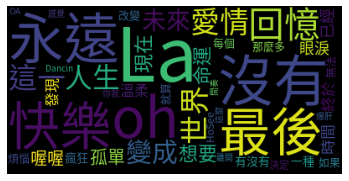

<Figure size 1000x600 with 0 Axes>

In [47]:
wc = WordCloud(font_path="./SourceHanSansTW-Regular.otf", #設置字體
                   background_color="white", #背景顏色
                   max_words = 2000)#文字雲顯示最大詞數


# 產生文字雲
wc.generate(text)

# 視覺化
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

# # 存檔
# wc.to_file(f"./wordcloud/五月天/全部歌曲_停用詞.jpg")